<a href="https://colab.research.google.com/github/Isuru-Weerasinghe/Isuru-Weerasinghe/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Ensure TensorFlow 2.x is used in Google Colab (this is specific to Colab only)
try:
    # This command forces Colab to use TensorFlow 2.x
    %tensorflow_version 2.x
except Exception:
    pass  # Ignore error if not in Colab (e.g., when running locally)

# Import TensorFlow and Keras components
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Other helpful libraries
import os
import numpy as np
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Import necessary module for file and directory operations
import os

# Download and extract the project files
!wget -q https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip  # -q for quiet mode, to suppress output
!unzip -q cats_and_dogs.zip  # -q to suppress output of the unzip process

# Define paths to the dataset
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get the number of files in each directory (train and validation directories have 'dogs' and 'cats' subdirectories)
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Display the number of files in each directory
print(f'Total training images: {total_train}')
print(f'Total validation images: {total_val}')
print(f'Total test images: {total_test}')

# Variables for pre-processing and training
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150



replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace __MACOSX/cats_and_dogs/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace cats_and_dogs/test/48.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
Total training images: 2001
Total validation images: 1001
Total test images: 51


In [4]:
# 3

# Initialize the ImageDataGenerator for data pre-processing and scaling
train_image_generator = ImageDataGenerator(rescale=1./255)  # Rescale images to [0, 1]
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Rescale images to [0, 1]
test_image_generator = ImageDataGenerator(rescale=1./255)  # Rescale images to [0, 1]

# Create data generators using flow_from_directory
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,  # Directory for the training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to a consistent size
    batch_size=batch_size,  # Number of images to return in each batch
    class_mode='binary',  # Binary classification: 'cat' vs 'dog'
    shuffle=True  # Shuffle the data
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,  # Directory for the validation data
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to a consistent size
    batch_size=batch_size,  # Number of images per batch
    class_mode='binary',  # Binary classification
    shuffle=False  # No need to shuffle validation data
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,  # Directory for the test data
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to a consistent size
    batch_size=batch_size,  # Number of images per batch
    class_mode=None,  # No labels for test data, just images
    shuffle=False  # Don't shuffle test data, as we need predictions in order
)

# Print the number of images in each dataset to verify
print(f'Total training samples: {train_data_gen.samples}')
print(f'Total validation samples: {val_data_gen.samples}')
print(f'Total test samples: {test_data_gen.samples}')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Total training samples: 2000
Total validation samples: 1000
Total test samples: 0


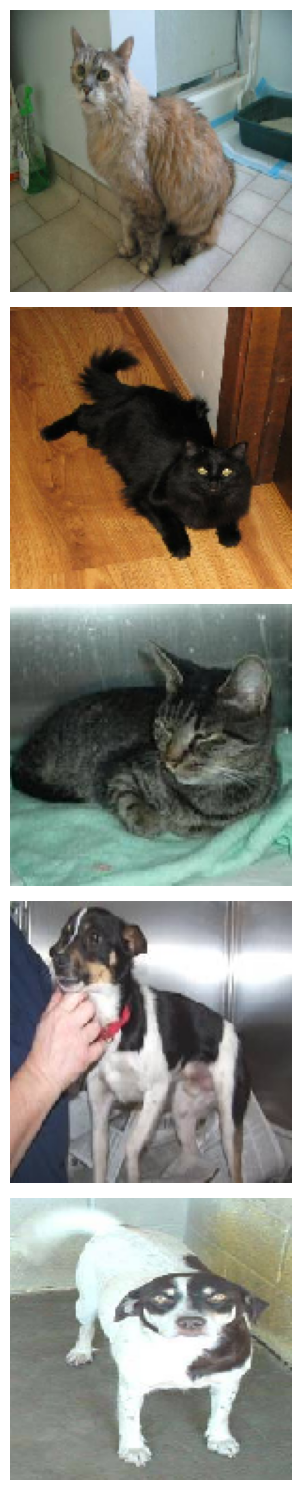

In [5]:
# 4

def plotImages(images_arr, probabilities=False):
    # Plot the images
    num_images = len(images_arr)
    fig, axes = plt.subplots(num_images, 1, figsize=(5, num_images * 3))

    if probabilities is False:
        # Display images without probabilities
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis('off')  # Hide the axis
    else:
        # Display images with predicted probabilities
        for img, probability, ax in zip(images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis('off')  # Hide the axis
            # Display the probability as a title (dog or cat with confidence)
            if probability > 0.5:
                ax.set_title(f"{probability * 100:.2f}% dog")
            else:
                ax.set_title(f"{(1 - probability) * 100:.2f}% cat")

    plt.tight_layout()
    plt.show()

# Get a batch of 5 sample images from the training data generator
sample_training_images, _ = next(train_data_gen)

# Plot the first 5 images from the batch
plotImages(sample_training_images[:5])


In [6]:
# 5

# Recreate the train_image_generator with additional data augmentation transformations
train_image_generator = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Apply random shear transformation
    zoom_range=0.2,  # Apply random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any empty pixels after transformations
)

# Recreate the train_data_gen using the updated train_image_generator
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,  # Directory for the training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to a consistent size
    batch_size=batch_size,  # Number of images per batch
    class_mode='binary',  # Binary classification (cat vs dog)
    shuffle=True  # Shuffle the data for training
)

# Print the number of images in the training set
print(f'Total training samples: {train_data_gen.samples}')



Found 2000 images belonging to 2 classes.
Total training samples: 2000


Found 2000 images belonging to 2 classes.


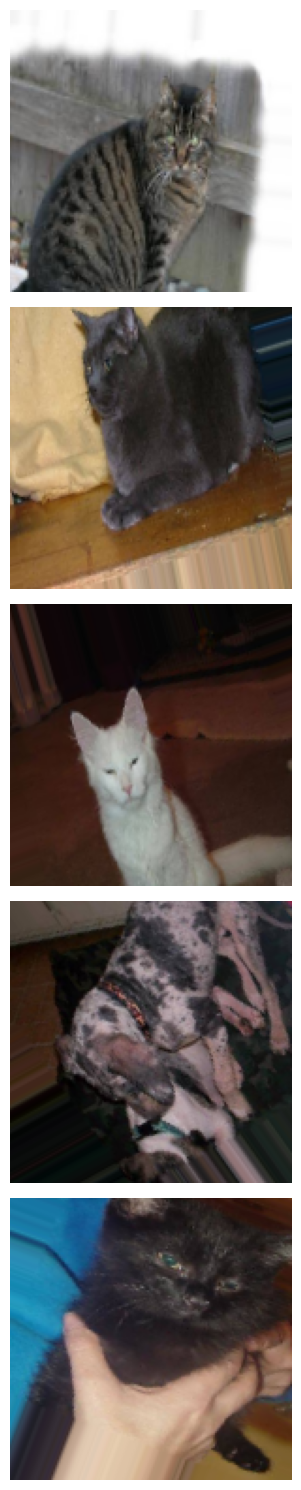

In [7]:
# 6

# Re-create the train_data_gen to use augmented images
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Fetch the first batch of images
augmented_images, _ = next(train_data_gen)  # We only need the images, not labels

# Select the first 5 augmented images from the batch
augmented_images = augmented_images[:5]

# Plot the images using the previously defined plotImages function
plotImages(augmented_images)


In [8]:
# 7

# Build the model
model = Sequential()

# 1. Convolutional layer (filters, kernel size, activation function, input shape)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# 2. MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Convolutional layer (more filters)
model.add(Conv2D(64, (3, 3), activation='relu'))

# 4. MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5. Convolutional layer (more filters)
model.add(Conv2D(128, (3, 3), activation='relu'))

# 6. MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 7. Flatten the 3D feature maps into 1D vector for the fully connected layers
model.add(Flatten())

# 8. Fully connected layer
model.add(Dense(128, activation='relu'))

# 9. Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# 10. Output layer with 1 unit (for binary classification) and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Show the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 8

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer is commonly used for binary classification
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model
history = model.fit(
    train_data_gen,  # The training data generator
    steps_per_epoch=total_train // batch_size,  # Number of batches per epoch
    epochs=epochs,  # Number of epochs to train for
    validation_data=val_data_gen,  # Validation data generator
    validation_steps=total_val // batch_size  # Number of batches for validation
)

# Print the history of training and validation accuracy
print("Training and Validation Accuracy: ", history.history['accuracy'])
print("Training and Validation Loss: ", history.history['loss'])


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 127s 8s/step - accuracy: 0.5047 - loss: 0.7027 - val_accuracy: 0.4509 - val_loss: 0.6891
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:13 5s/step - accuracy: 0.4609 - loss: 0.6977

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.4609 - loss: 0.6977 - val_accuracy: 0.4519 - val_loss: 0.6892
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step - accuracy: 0.5520 - loss: 0.6860 - val_accuracy: 0.5792 - val_loss: 0.6732
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.6406 - loss: 0.6644 - val_accuracy: 0.5962 - val_loss: 0.6682
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 137s 8s/step - accuracy: 0.5919 - loss: 0.6693 - val_accuracy: 0.6719 - val_loss: 0.6258
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.6016 - loss: 0.6391 - val_accuracy: 0.8077 - val_loss: 0.4594
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.6064 - loss: 0.6594 - val_accuracy: 0.6931 - val_loss: 0.6113
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.6094 - loss: 0.6422 - val_accuracy: 0.5096 - val_loss: 0.6389
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 130s 8s/step - accuracy: 0.6443 - loss: 0.6222 - val_accuracy: 0.6696 - val_loss: 0

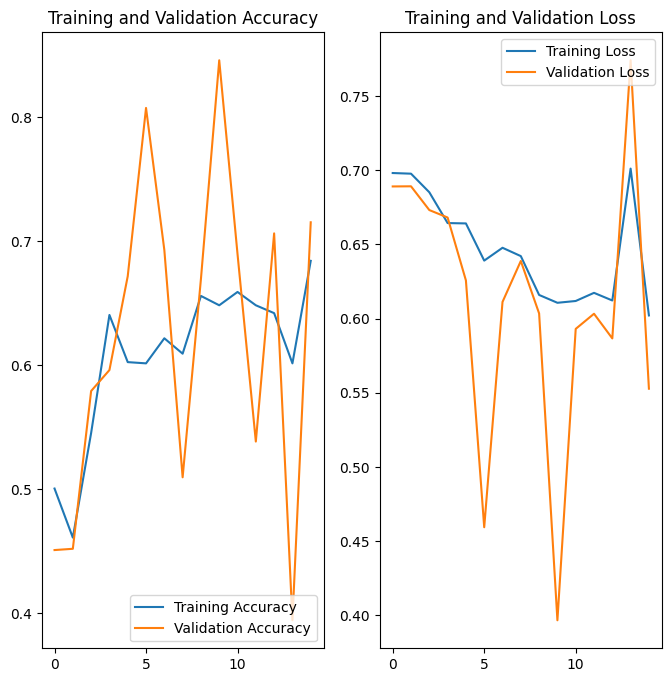

In [10]:
# 9

# Extract the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Set the number of epochs for the range
epochs_range = range(epochs)

# Create a figure with two subplots: one for accuracy and one for loss
plt.figure(figsize=(8, 8))

# Plot the accuracy graph
plt.subplot(1, 2, 1)  # Subplot 1 (left)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')  # Position of the legend
plt.title('Training and Validation Accuracy')

# Plot the loss graph
plt.subplot(1, 2, 2)  # Subplot 2 (right)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')  # Position of the legend
plt.title('Training and Validation Loss')

# Show the plots
plt.show()


In [16]:
test_data_gen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory for test data
test_data_gen = test_data_gen.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,   # No labels for the test set
    shuffle=False      # Don't shuffle for prediction consistency
)

print(f"Total test images: {test_data_gen.samples}")


Found 0 images belonging to 0 classes.
Total test images: 0
